# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | touros
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | aur
Processing Record 6 of Set 1 | cole harbour
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | broken hill
Processing Record 13 of Set 1 | kathmandu
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | howard springs
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | veraval
Processing Record 18 of Set 1 | kidal
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | wailua homesteads
Processing Reco

Processing Record 38 of Set 4 | tromso
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | gewane
Processing Record 41 of Set 4 | wonosobo
Processing Record 42 of Set 4 | ardakan
Processing Record 43 of Set 4 | afaahiti
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | guatire
Processing Record 46 of Set 4 | sijunjung
Processing Record 47 of Set 4 | yengema
Processing Record 48 of Set 4 | nampula
Processing Record 49 of Set 4 | beykonak
Processing Record 0 of Set 5 | darnah
Processing Record 1 of Set 5 | beledweyne
Processing Record 2 of Set 5 | n'zeto
Processing Record 3 of Set 5 | isafjordur
Processing Record 4 of Set 5 | swakopmund
Processing Record 5 of Set 5 | natal
Processing Record 6 of Set 5 | ushtobe
Processing Record 7 of Set 5 | revda
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | prince george
Processing Record 10 of Set 5 | kuhmo
Processing Record 11 of Set 5 | nueva gerona
Processing Record 12 of Set 

Processing Record 31 of Set 8 | shakawe
Processing Record 32 of Set 8 | tongshan
Processing Record 33 of Set 8 | mizdah
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | sao miguel do araguaia
Processing Record 37 of Set 8 | hermanus
Processing Record 38 of Set 8 | south hedland
Processing Record 39 of Set 8 | dawei
Processing Record 40 of Set 8 | koungheul
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | yangjiang
Processing Record 43 of Set 8 | squamish
Processing Record 44 of Set 8 | tchibanga
Processing Record 45 of Set 8 | valle de la pascua
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | necocli
Processing Record 48 of Set 8 | labytnangi
Processing Record 49 of Set 8 | margate
Processing Record 0 of Set 9 | alotau
City not found. Skipping...
Processing Record 1 of Set 9 | araguari
Processing Record 2 of Set 9 | kudymkar
Processing Record 3 of Set 9 | machico
Processing Rec

Processing Record 17 of Set 12 | ericeira
Processing Record 18 of Set 12 | palangkaraya
Processing Record 19 of Set 12 | colonel hill
Processing Record 20 of Set 12 | mawlaik
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | camana
Processing Record 23 of Set 12 | krasnovishersk
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | valladolid
Processing Record 26 of Set 12 | carnarvon
Processing Record 27 of Set 12 | bella union
Processing Record 28 of Set 12 | chiras
Processing Record 29 of Set 12 | tsiombe
Processing Record 30 of Set 12 | privolzhskiy
Processing Record 31 of Set 12 | vyazemskiy
Processing Record 32 of Set 12 | zhosaly
Processing Record 33 of Set 12 | lerma
Processing Record 34 of Set 12 | valdivia
Processing Record 35 of Set 12 | nushki
Processing Record 36 of Set 12 | malango
Processing Record 37 of Set 12 | san jose del guaviare
Processing Record 38 of Set 12 | thenzawl
Processing Record 39 of Set 12 | vangaindrano


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,9.85,71,75,5.14,CA,1690221874
1,bethel,41.3712,-73.4140,30.30,56,20,6.17,US,1690222467
2,touros,-5.1989,-35.4608,28.27,61,36,8.54,BR,1690221910
3,grytviken,-54.2811,-36.5092,-5.71,75,86,4.51,GS,1690222467
4,aur,8.1499,171.1687,28.43,75,82,8.12,MH,1690222467


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,9.85,71,75,5.14,CA,1690221874
1,bethel,41.3712,-73.4140,30.30,56,20,6.17,US,1690222467
2,touros,-5.1989,-35.4608,28.27,61,36,8.54,BR,1690221910
3,grytviken,-54.2811,-36.5092,-5.71,75,86,4.51,GS,1690222467
4,aur,8.1499,171.1687,28.43,75,82,8.12,MH,1690222467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

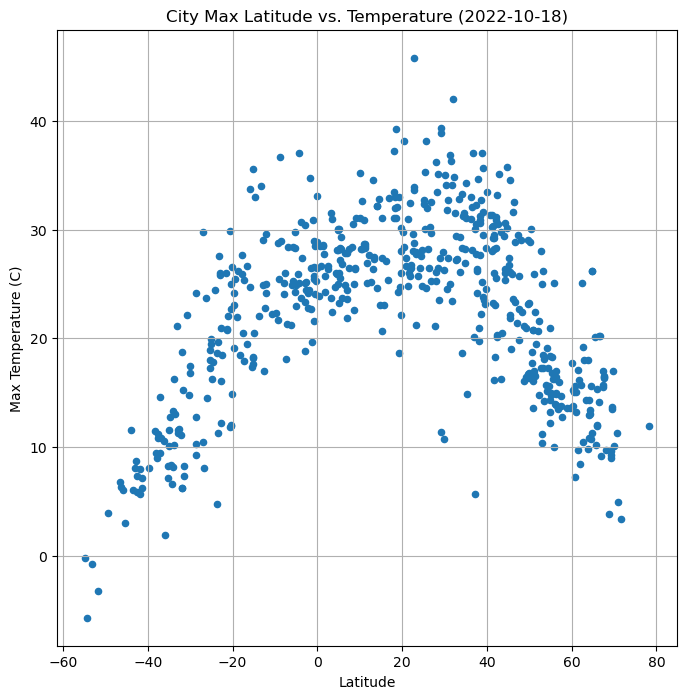

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Temperature (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

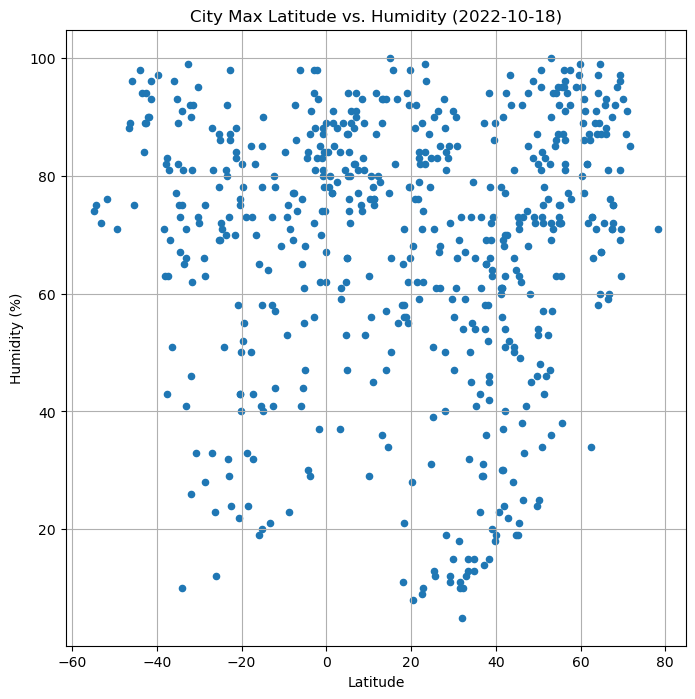

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Humidity (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

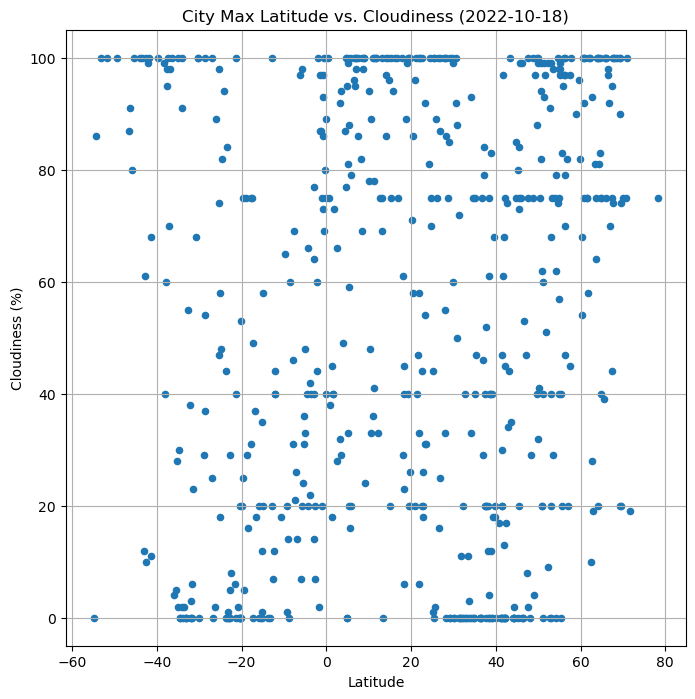

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Cloudiness (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

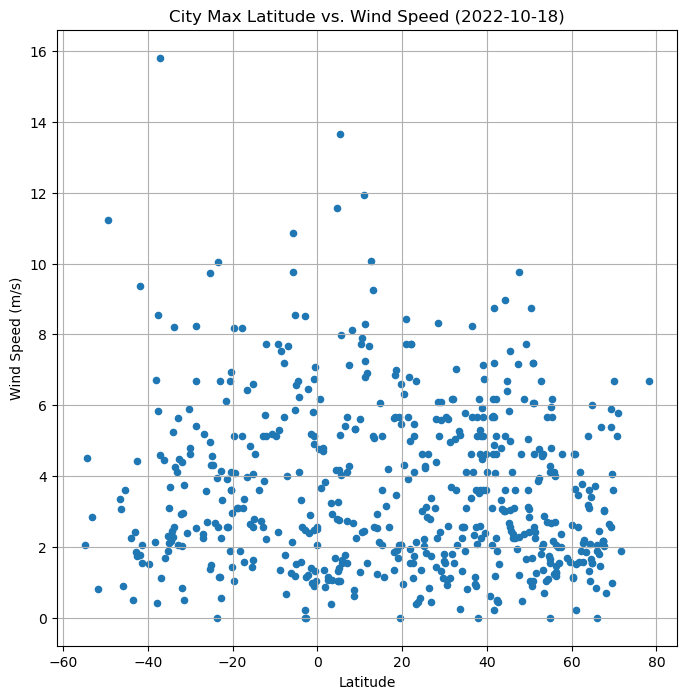

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Wind Speed (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values): 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values)

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,30), color='r')

    plt.show()
    print(f"The r-value is: {r_value}")

In [13]:
city_data_df.loc[city_data_df['Lat'] >= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,9.85,71,75,5.14,CA,1690221874
1,bethel,41.3712,-73.4140,30.30,56,20,6.17,US,1690222467
4,aur,8.1499,171.1687,28.43,75,82,8.12,MH,1690222467
5,cole harbour,44.6724,-63.4751,30.10,64,75,6.69,CA,1690222467
8,coahuayana de hidalgo,18.7000,-103.6583,32.12,56,89,1.90,MX,1690222468
...,...,...,...,...,...,...,...,...,...
569,ternate,0.8000,127.4000,26.66,80,38,3.66,ID,1690222612
570,sur,22.5667,59.5289,29.60,71,100,1.13,OM,1690222103
571,kostomuksha,64.5710,30.5767,10.73,99,100,1.65,RU,1690222612


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,9.85,71,75,5.14,CA,1690221874
1,bethel,41.3712,-73.4140,30.30,56,20,6.17,US,1690222467
4,aur,8.1499,171.1687,28.43,75,82,8.12,MH,1690222467
5,cole harbour,44.6724,-63.4751,30.10,64,75,6.69,CA,1690222467
8,coahuayana de hidalgo,18.7000,-103.6583,32.12,56,89,1.90,MX,1690222468


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,touros,-5.1989,-35.4608,28.27,61,36,8.54,BR,1690221910
3,grytviken,-54.2811,-36.5092,-5.71,75,86,4.51,GS,1690222467
6,blackmans bay,-43.0167,147.3167,8.07,84,12,2.42,AU,1690222467
7,port-aux-francais,-49.3500,70.2167,3.95,71,100,11.24,TF,1690222467
9,edinburgh of the seven seas,-37.0676,-12.3116,14.63,81,70,15.81,SH,1690222468


###  Temperature vs. Latitude Linear Regression Plot

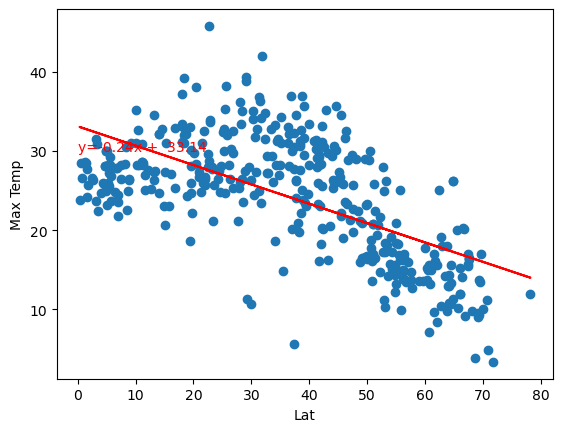

The r-value is: -0.6326689920685433


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Max Temp'].values
plt.xlabel('Lat')
plt.ylabel('Max Temp')
linreg(x_values, y_values)

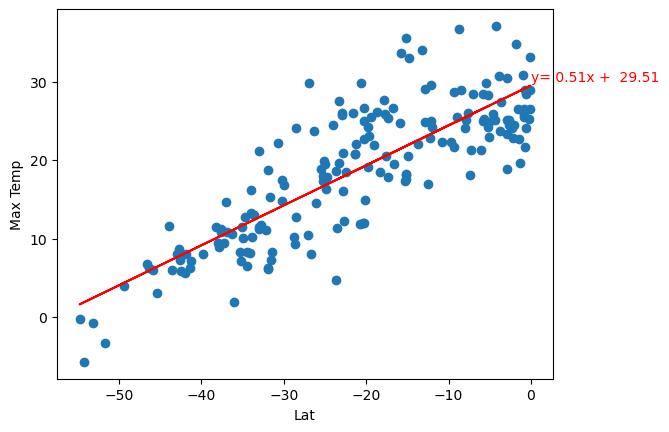

The r-value is: 0.8276195004200815


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Max Temp'].values
plt.xlabel('Lat')
plt.ylabel('Max Temp')
linreg(x_values, y_values)

**Discussion about the linear relationship:** 
Looking at the northern hemisphere, as the latitude decreases, the maximum temperature decreases. The reverse is true in the southern hemisphere, where as the latitude increases, the max temperature increases. There is a direct coorelation to where a country is and what the temperature will be. Overall, the more negative the latitude the colder the temperature will be in the southern hemisphere versus the more negative the latitude the warmer the temperature will be in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

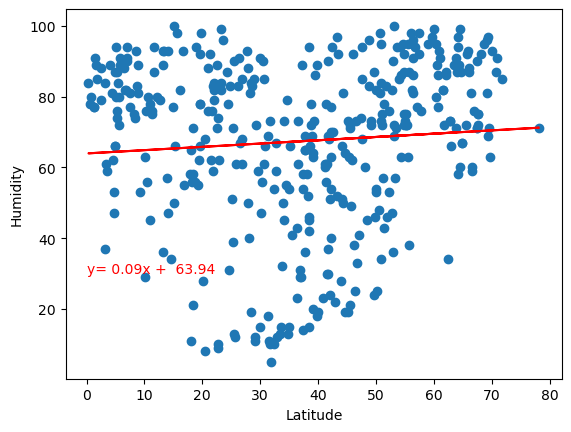

The r-value is: 0.07732673459218539


In [18]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Humidity'].values
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linreg(x_values, y_values)

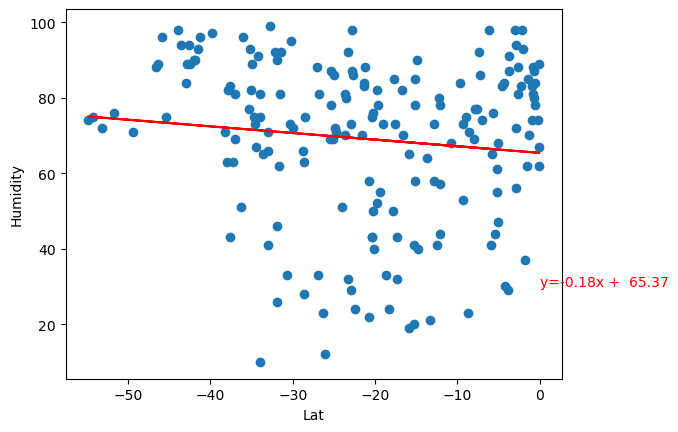

The r-value is: -0.11616279699232823


In [19]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Humidity'].values
plt.xlabel('Lat')
plt.ylabel('Humidity')
linreg(x_values, y_values)

**Discussion about the linear relationship:**
With the data presented, there does not seem to be a positive or negative correlation between humidity and latitude between the two hemispheres. Both have plenty of outliers outside of the line of regression, so this data is unable to give us any correlation between the two. 

### Cloudiness vs. Latitude Linear Regression Plot

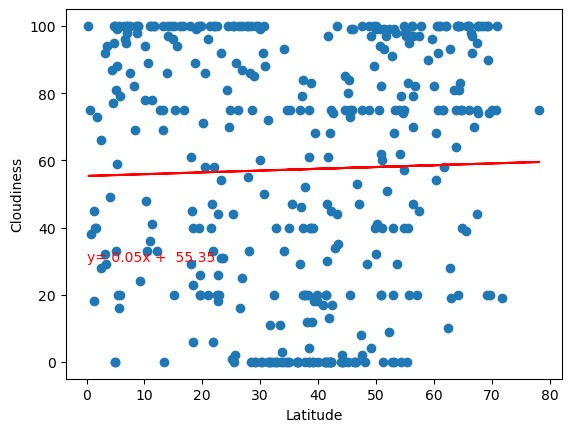

The r-value is: 0.028162803478577084


In [20]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Cloudiness'].values
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linreg(x_values, y_values)

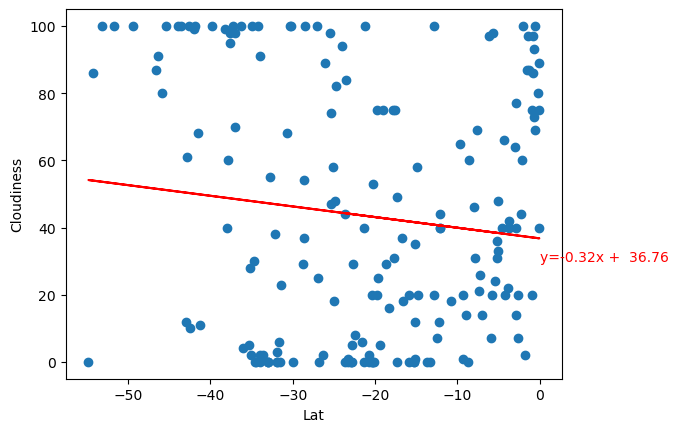

The r-value is: -0.12086053244303707


In [21]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Cloudiness'].values
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
linreg(x_values, y_values)

**Discussion about the linear relationship:**
Again, with the data presented there is no correlation between more/less clouds and the different latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

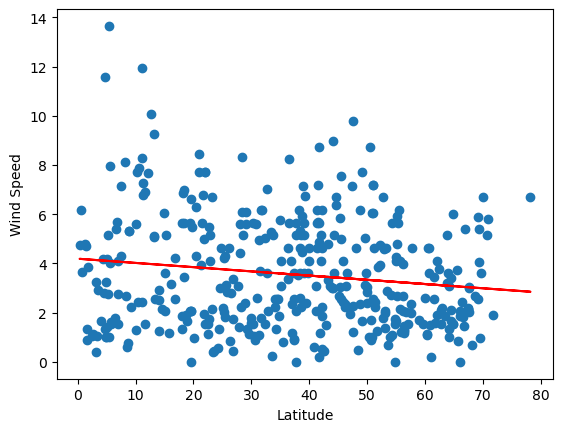

The r-value is: -0.14730198560448


In [22]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Wind Speed'].values
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linreg(x_values, y_values)

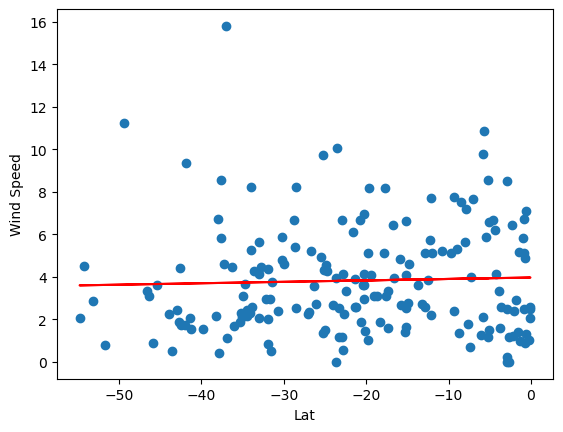

The r-value is: 0.037291615269711524


In [23]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Wind Speed'].values
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
linreg(x_values, y_values)

**Discussion about the linear relationship:** 
It is not a strong positive correlation, but a small one between more positive latitude and higher wind speeds in the southern hemisphere. The reverse is true in the northern hemisphere, where the more positive latitude, the lower the wind speeds. This is not a strong correlation. 